In [1]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop\\RSIP project 2020\\python codes'

In [2]:
os.chdir("C:\\Users\\HP\\Desktop\\RSIP project 2020\\data sets")
os.getcwd()

'C:\\Users\\HP\\Desktop\\RSIP project 2020\\data sets'

# importing dataset and libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns

In [6]:
#Import the data
df=pd.read_csv("Health monitoring.csv")
df

,SBP,DBP,Pulse,Temperature,Level
0,120,80,80,98,0
1,140,83,75,100,1
2,155,100,92,104,2
3,115,82,79,97,0
4,119,79,85,102,1
...,...,...,...,...,...
144,154,99,83,103,2
145,118,77,73,98,0
146,125,87,79,102,1
147,132,88,78,101,1


# Exploratory data analysis

In [7]:
df.describe()

,SBP,DBP,Pulse,Temperature,Level
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,123.516779,81.261745,75.550336,99.926174,0.993289
std,14.486995,9.752613,5.344151,2.056939,0.850252
min,95.000000,60.000000,60.000000,94.000000,0.000000
25%,117.000000,77.000000,72.000000,98.000000,0.000000
50%,119.000000,80.000000,76.000000,100.000000,1.000000
75%,132.000000,88.000000,79.000000,101.000000,2.000000
max,155.000000,101.000000,92.000000,106.000000,2.000000


In [8]:
df.cov()

,SBP,DBP,Pulse,Temperature,Level
SBP,209.873027,133.357065,42.990704,7.545166,2.571059
DBP,133.357065,95.113459,27.037412,3.749184,0.900417
Pulse,42.990704,27.037412,28.559949,4.317930,1.746962
Temperature,7.545166,3.749184,4.317930,4.230999,1.134636
Level,2.571059,0.900417,1.746962,1.134636,0.722928


In [9]:
df.corr()

,SBP,DBP,Pulse,Temperature,Level
SBP,1.000000,0.943880,0.555287,0.253203,0.208731
DBP,0.943880,1.000000,0.518759,0.186894,0.108586
Pulse,0.555287,0.518759,1.000000,0.392804,0.384465
Temperature,0.253203,0.186894,0.392804,1.000000,0.648766
Level,0.208731,0.108586,0.384465,0.648766,1.000000


In [10]:
df.head()

,SBP,DBP,Pulse,Temperature,Level
0,120,80,80,98,0
1,140,83,75,100,1
2,155,100,92,104,2
3,115,82,79,97,0
4,119,79,85,102,1


In [11]:
df.tail()

,SBP,DBP,Pulse,Temperature,Level
144,154,99,83,103,2
145,118,77,73,98,0
146,125,87,79,102,1
147,132,88,78,101,1
148,118,82,74,98,0


In [12]:
df.columns

Index(['SBP', 'DBP', 'Pulse', 'Temperature', 'Level'], dtype='object')

In [13]:
df.dtypes

SBP            int64
DBP            int64
Pulse          int64
Temperature    int64
Level          int64
dtype: object

In [14]:
df['Temperature'].unique()

array([ 98, 100, 104,  97, 102, 101,  99, 103,  95,  94, 105, 106],
      dtype=int64)

In [15]:
df['Pulse']

0      80
1      75
2      92
3      79
4      85
       ..
144    83
145    73
146    79
147    78
148    74
Name: Pulse, Length: 149, dtype: int64

In [16]:
df[0:8]

,SBP,DBP,Pulse,Temperature,Level
0,120,80,80,98,0
1,140,83,75,100,1
2,155,100,92,104,2
3,115,82,79,97,0
4,119,79,85,102,1
5,95,65,75,101,2
6,116,75,70,99,0
7,100,60,79,98,2


In [17]:
mean_temp=df['Temperature'].mean()
mean_temp

99.9261744966443

In [18]:
df.shape

(149, 5)

In [19]:
df.pivot_table(df,index=['Temperature'])

,DBP,Level,Pulse,SBP
Temperature,,,,
94,60.000000,2.000000,65.000000,99.000000
95,65.000000,2.000000,62.000000,100.000000
97,82.000000,0.000000,79.000000,115.000000
98,79.022727,0.250000,73.250000,118.522727
99,80.240000,0.560000,73.680000,122.200000
100,85.076923,1.192308,77.923077,130.346154
101,83.000000,1.421053,76.842105,124.947368
102,81.466667,1.800000,77.000000,125.000000
103,82.000000,2.000000,81.666667,127.333333


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SBP          149 non-null    int64
 1   DBP          149 non-null    int64
 2   Pulse        149 non-null    int64
 3   Temperature  149 non-null    int64
 4   Level        149 non-null    int64
dtypes: int64(5)
memory usage: 5.9 KB


In [21]:
df['Pulse'].value_counts()

79    18
76    17
70    16
80    14
75    14
74     8
82     8
78     7
73     6
69     5
68     5
77     4
84     4
81     3
65     3
85     3
72     3
83     2
71     2
64     2
62     1
92     1
66     1
67     1
60     1
Name: Pulse, dtype: int64

In [22]:
df['DBP'].value_counts()

78     19
79     15
87     10
80      8
88      8
85      7
76      6
68      6
77      5
90      5
65      5
89      4
92      4
86      4
95      4
99      4
60      4
67      3
69      2
75      2
64      2
101     2
100     2
83      2
84      2
94      2
96      2
82      2
81      1
73      1
91      1
93      1
66      1
98      1
63      1
62      1
Name: DBP, dtype: int64

In [23]:
df['SBP'].value_counts()

118    17
119    14
120     9
117     8
116     7
126     7
128     6
100     5
127     5
132     4
130     4
115     3
104     3
145     3
146     3
99      3
140     3
101     3
148     3
147     3
98      2
151     2
149     2
125     2
114     2
136     2
154     2
106     2
105     2
134     2
135     2
107     1
110     1
102     1
155     1
124     1
129     1
131     1
133     1
139     1
142     1
150     1
152     1
153     1
95      1
Name: SBP, dtype: int64

# Data vizualisation

# Histograms 

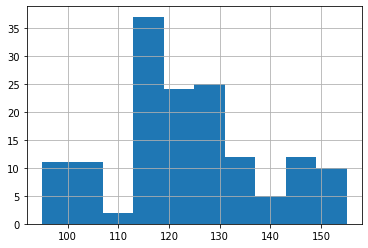

In [24]:
df['SBP'].hist(bins=10)

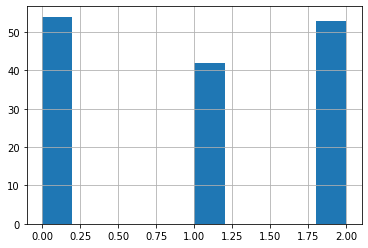

In [25]:
df['Level'].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B6F5993088>,
      dtype=object)

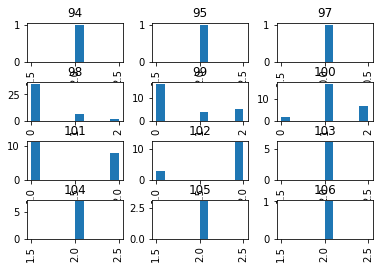

In [26]:
df.hist(column = 'Level',by = 'Temperature',bins = 10)

# Boxplot 

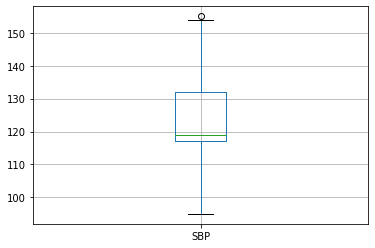

In [27]:
df.boxplot(column='SBP')

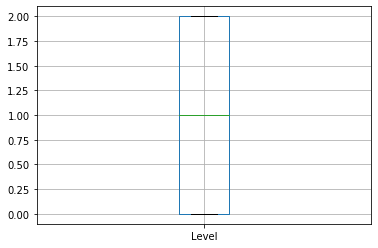

In [28]:
df.boxplot(column='Level')

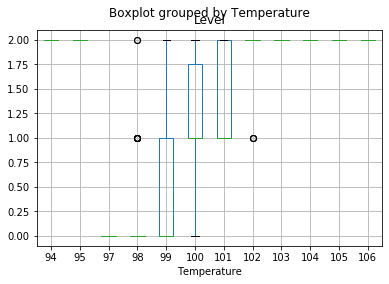

In [29]:
df.boxplot(column = 'Level' ,by ='Temperature')

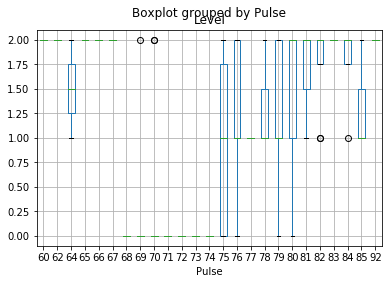

In [30]:
df.boxplot(column = 'Level' ,by ='Pulse')

In [40]:
!pip install cufflinks plotly

In [41]:
!pip install chart-studio

In [42]:
#standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode

In [43]:
#using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [48]:
df[['SBP','Level']].iplot()

In [49]:
df[['SBP','Level']].iplot(kind = 'scatter',mode = 'markers')

In [50]:
df.iplot(kind = 'bar',x = 'SBP',y = 'Level')

In [51]:
df[['SBP','Level']].iplot(kind = 'surface',colorscale = 'blues')

# missing values 

In [52]:
#Get a count of missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

SBP            0
DBP            0
Pulse          0
Temperature    0
Level          0
dtype: int64

In [53]:
#there is no missing data in the given dataset

# Outliers

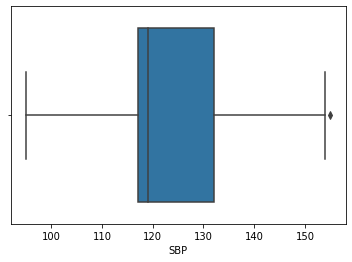

In [54]:
#Discover outliers with visualzation tools
#Create a boxplot for 'SBP'
import seaborn as sns
sns.boxplot(x=df['SBP'])

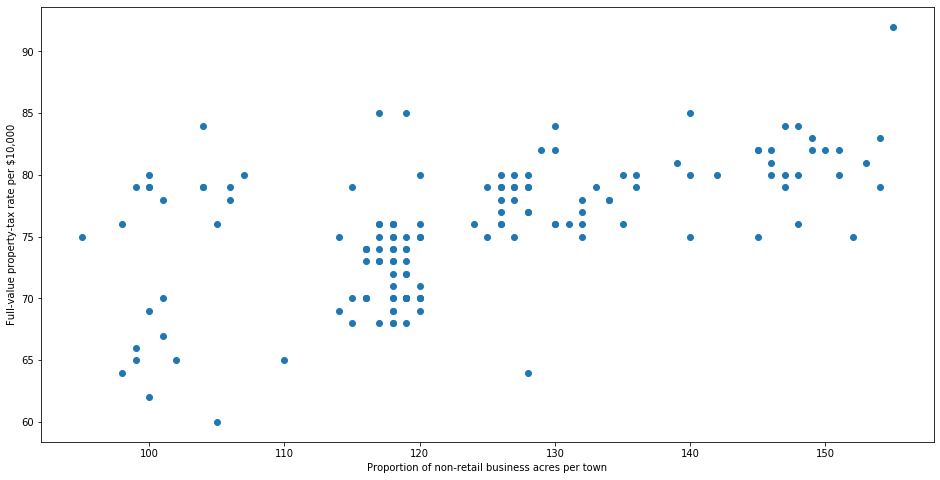

In [55]:
#Create a scatter plot for two variables 'indus' & 'tax'
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['SBP'], df['Pulse'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

# Working with outliers

In [56]:
#Get Z-scores of Health monitoring system
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.24357291 0.12981141 0.83543145 0.93958575 1.17216922]
 [1.1416318  0.17883593 0.10332636 0.036012   0.00792006]
 [2.18053533 1.92783754 3.08845021 1.98720749 1.18800934]
 [0.58987408 0.07595348 0.64767989 1.42738462 1.17216922]
 [0.31283314 0.23269386 1.77418927 1.01160974 0.00792006]
 [1.97507879 1.67304813 0.10332636 0.52381087 1.18800934]
 [0.52061385 0.64422365 1.04208418 0.45178687 1.17216922]
 [1.62877761 2.18746037 0.64767989 0.93958575 1.18800934]
 [0.31283314 0.33557631 1.4175873  0.036012   1.17216922]
 [0.93617526 1.26151834 1.98084199 1.01160974 1.18800934]
 [0.45135361 0.84998854 0.0844252  0.45178687 1.17216922]
 [0.44902945 0.69324817 1.5864377  0.52381087 0.00792006]
 [1.48793298 0.89901307 1.21093458 1.98720749 1.18800934]
 [0.38209338 0.64422365 0.10332636 0.45178687 1.17216922]
 [0.65913432 0.5413412  1.22983574 0.93958575 1.17216922]
 [1.28247644 1.67304813 2.91959981 1.01160974 1.18800934]
 [0.58754992 0.79613062 0.0844252  0.52381087 0.00792006]
 [0.79533062 0

In [57]:
# Define a threshold to identify an outlier.
threshold = 3
print(np.where(z > 3))

(array([2], dtype=int64), array([2], dtype=int64))


In [58]:
print(z[22][1])

0.7961306191277138


In [59]:
#Find outliers using IQR Score(i.e. IQR=Q3-Q1) 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SBP            15.0
DBP            11.0
Pulse           7.0
Temperature     3.0
Level           2.0
dtype: float64


In [60]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

       SBP    DBP  Pulse  Temperature  Level
0    False  False  False        False  False
1    False  False  False        False  False
2    False  False  False        False  False
3    False  False  False        False  False
4    False  False  False        False  False
..     ...    ...    ...          ...    ...
144  False  False  False        False  False
145  False  False  False        False  False
146  False  False  False        False  False
147  False  False  False        False  False
148  False  False  False        False  False

[149 rows x 5 columns]


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [63]:
#Get clean data by removing or filtering the outliers
health_df_o = df[(z < 3).all(axis=1)]

In [64]:
health_df_o

,SBP,DBP,Pulse,Temperature,Level
0,120,80,80,98,0
1,140,83,75,100,1
3,115,82,79,97,0
4,119,79,85,102,1
5,95,65,75,101,2
...,...,...,...,...,...
144,154,99,83,103,2
145,118,77,73,98,0
146,125,87,79,102,1
147,132,88,78,101,1


In [65]:
df.shape

(149, 5)

In [66]:
health_df_o.shape

(148, 5)

In [67]:
#Use IQR score to filterout the outliers to keep only valid values

In [68]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(142, 5)

# Label Encoding and one Hot Encoding

In [69]:
#it is not possible to perform label and one hot encoding because there is no textual data present in the given dataset

# Feature Scalling

In [70]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]

In [71]:
x

,SBP,DBP,Pulse,Temperature
0,120,80,80,98
1,140,83,75,100
3,115,82,79,97
4,119,79,85,102
5,95,65,75,101
...,...,...,...,...
144,154,99,83,103
145,118,77,73,98
146,125,87,79,102
147,132,88,78,101


In [72]:
y

0      0
1      1
3      0
4      1
5      2
      ..
144    2
145    0
146    1
147    1
148    0
Name: Level, Length: 142, dtype: int64

In [73]:
#Apply normalization to rescale the features to a standard range of values.
#Normalize the numeric variables from column2 to column 4 in the dataframe
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.42372881, 0.46153846, 0.7826087 , 0.3       ],
       [0.76271186, 0.53846154, 0.56521739, 0.5       ],
       [0.33898305, 0.51282051, 0.73913043, 0.2       ],
       [0.40677966, 0.43589744, 1.        , 0.7       ],
       [0.        , 0.07692308, 0.56521739, 0.6       ],
       [0.3559322 , 0.33333333, 0.34782609, 0.4       ],
       [0.40677966, 0.41025641, 0.26086957, 0.5       ],
       [0.25423729, 0.17948718, 0.13043478, 0.7       ],
       [0.37288136, 0.28205128, 0.60869565, 0.4       ],
       [0.59322034, 0.66666667, 0.95652174, 0.6       ],
       [0.84745763, 0.71794872, 0.86956522, 0.9       ],
       [0.38983051, 0.33333333, 0.56521739, 0.4       ],
       [0.3220339 , 0.35897436, 0.30434783, 0.3       ],
       [0.62711864, 0.69230769, 0.60869565, 0.6       ],
       [0.6779661 , 0.64102564, 0.60869565, 0.5       ],
       [0.76271186, 0.74358974, 0.7826087 , 0.7       ],
       [0.40677966, 0.41025641, 0.34782609, 0.4       ],
       [0.3559322 , 0.38461538,

# Training and Testing

In [74]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [75]:
x_train

,SBP,DBP,Pulse,Temperature
72,127,87,78,98
124,130,85,76,100
3,115,82,79,97
41,100,65,79,100
54,119,78,70,98
...,...,...,...,...
76,118,77,70,99
1,140,83,75,100
137,116,78,73,98
27,128,87,80,100


In [76]:
y_train = y_train.astype('int')
y_train

72     1
124    1
3      0
41     2
54     0
      ..
76     0
1      1
137    0
27     1
80     2
Name: Level, Length: 113, dtype: int32

In [77]:
x_test

,SBP,DBP,Pulse,Temperature
53,126,87,76,99
35,115,78,68,99
122,126,87,77,101
0,120,80,80,98
90,119,78,70,98
107,102,67,65,101
83,117,80,73,99
71,126,85,76,100
131,120,78,71,99
112,152,98,75,99


In [78]:
y_test = y_test.astype('int')
y_test

53     1
35     0
122    1
0      0
90     0
107    2
83     0
71     1
131    0
112    2
44     0
62     0
8      0
125    2
33     0
144    2
23     1
16     1
97     2
140    1
78     2
30     2
29     2
14     0
67     2
74     0
32     0
51     2
50     0
Name: Level, dtype: int32

# KNN classifier

In [79]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
#Predict on test data
y_pred=clf.predict(x_test)

In [81]:
print("Actual Level : ")
print(y_test.values)

Actual Level : 
[1 0 1 0 0 2 0 1 0 2 0 0 0 2 0 2 1 1 2 1 2 2 2 0 2 0 0 2 0]


In [82]:
print("\nPredicted Level : ")
print(y_pred)


Predicted Level : 
[1 0 1 0 0 2 0 1 0 2 0 0 0 2 0 2 1 1 2 1 2 2 2 0 2 0 0 2 0]


In [83]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100)) 


Accuracy score: 100.000000


In [84]:
#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(x_test)

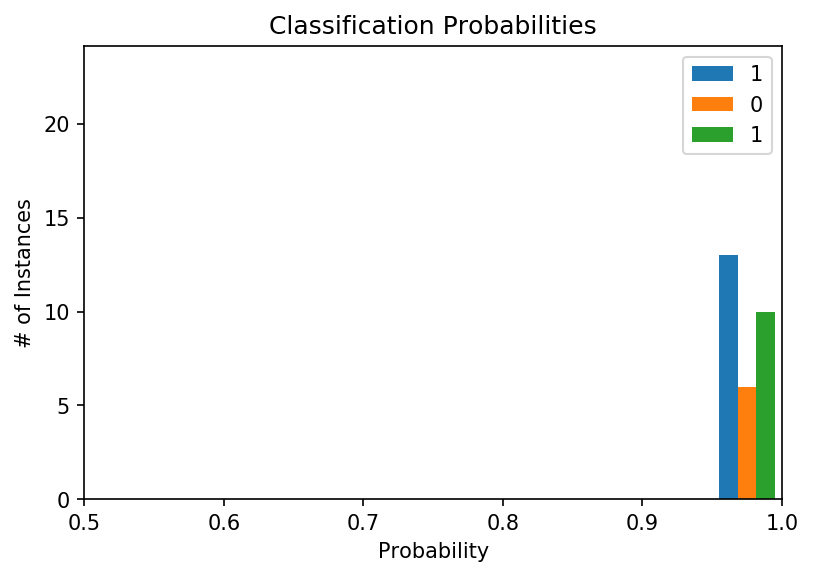

In [85]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

In [86]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [87]:
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [91]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [92]:
clf_proba = cross_val_predict(clf, x_train_std, y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class 

In [93]:
clf_acc

array([0.97368421, 1.        , 0.91891892])

# Logistic Regression

In [94]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_acc = cross_val_score(lr, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [95]:
lr_acc

array([0.73684211, 0.76315789, 0.75675676])

In [96]:
#Predict on test data
y_pred=lr.predict(x_test)

In [97]:
print("Actual Level : ")
print(y_test.values)

Actual Level : 
[1 0 1 0 0 2 0 1 0 2 0 0 0 2 0 2 1 1 2 1 2 2 2 0 2 0 0 2 0]


In [98]:
print("\nPredicted Level : ")
print(y_pred)


Predicted Level : 
[1 0 1 1 0 0 0 1 0 1 0 0 0 2 0 1 1 1 2 2 2 0 2 0 1 2 2 1 0]


In [99]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))


Accuracy score: 65.517241


In [100]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# Decission tree regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor as dr
#Create the Decision Tree regressor object 
regressor = dr(random_state=0)

In [102]:
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [103]:
accuracy=regressor.score(x,y)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 1.0


# multiple linear regression

In [104]:
x=df.iloc[:,0:4].values
x

array([[120,  80,  80,  98],
       [140,  83,  75, 100],
       [115,  82,  79,  97],
       [119,  79,  85, 102],
       [ 95,  65,  75, 101],
       [116,  75,  70,  99],
       [119,  78,  68, 100],
       [110,  69,  65, 102],
       [117,  73,  76,  99],
       [130,  88,  84, 101],
       [145,  90,  82, 104],
       [118,  75,  75,  99],
       [114,  76,  69,  98],
       [132,  89,  76, 101],
       [135,  87,  76, 100],
       [140,  91,  80, 102],
       [119,  78,  70,  99],
       [116,  77,  74,  98],
       [106,  68,  79, 103],
       [129,  89,  82, 100],
       [126,  90,  80, 101],
       [147,  95,  84, 104],
       [116,  78,  70,  98],
       [118,  76,  68,  99],
       [128,  87,  80, 100],
       [130,  85,  82, 101],
       [148,  92,  84, 104],
       [100,  65,  62,  95],
       [119,  78,  74,  98],
       [117,  79,  76,  99],
       [116,  80,  74,  98],
       [115,  78,  68,  99],
       [126,  85,  79, 100],
       [127,  89,  80,  98],
       [128,  

In [105]:
y=df.iloc[:,4].values
y

array([0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2,
       0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1,
       0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1,
       1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 2, 0, 1, 1, 0], dtype=int64)

In [106]:
from sklearn.model_selection import train_test_split  #train_test_split splits arrays or matrices into random train and test subsets. 
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state =1) 

In [107]:
X_train

array([[151,  99,  82, 103],
       [118,  81,  72,  98],
       [130,  85,  76, 100],
       [118,  79,  69,  98],
       [119,  80,  73,  99],
       [146, 101,  82, 101],
       [148,  90,  76, 101],
       [127,  84,  75, 100],
       [118,  79,  71,  98],
       [100,  63,  80, 103],
       [140,  99,  85, 102],
       [149,  96,  82, 103],
       [119,  78,  70,  98],
       [118,  79,  73,  99],
       [132,  86,  75, 102],
       [145,  90,  82, 104],
       [128,  88,  79, 101],
       [126,  85,  79, 100],
       [125,  85,  75, 100],
       [118,  79,  70,  99],
       [145, 100,  75, 100],
       [118,  82,  74,  98],
       [100,  65,  62,  95],
       [118,  76,  68,  99],
       [128,  88,  77,  99],
       [120,  78,  71,  99],
       [153, 101,  81, 102],
       [119,  79,  70,  98],
       [106,  62,  78, 102],
       [119,  79,  70,  98],
       [118,  79,  76, 105],
       [118,  77,  73,  98],
       [102,  67,  65, 101],
       [101,  68,  67, 104],
       [140,  

In [108]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x,y) 

In [109]:
predictions = model.predict(x)

In [110]:
accuracy=model.score(x,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.5456935757383887


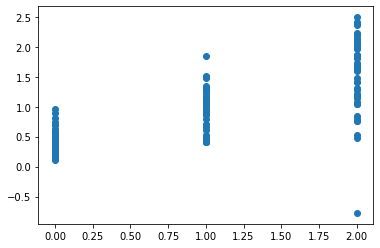

In [111]:
plt.scatter(y, predictions)